## Health Information Systems and Decision Support Systems
## WPO 2: Data-driven systems  (04/03/22)
***
*Jakub Ceranka, Pieter Boonen, Panagiotis Gonidakis, Jef Vandemeulebroucke* <br>
*Department of Electronics and Informatics (ETRO)* <br>
*Vrije Universiteit Brussel, Pleinlaan 2, B-1050 Brussels, Belgium*

<font color=blue>Insert students names and IDs here</font>

### Goal
The goal of this practical session is to get an insight into methods and algorithms for building knowledge-based decision-support systems. Your tasks will involve designing the systems, examining the output, tuning the parameters and validating the performance of your system against the ground-truth predictions done manually by an experienced radiologist. Students must send their notebook via Canvas Assignment functionality before the __11th of March, 2022, 23:59__. The grade from this practical session will contribute to your final grade. Questions: [jceranka@etrovub.be](mailto:jceranka@etrovub.be), [jwuts@etrovub.be](mailto:jwuts@etrovub.be)

### Libraries

During this practical session, the following libraries will be used. You can use different version of libraries, however we recommend the following build:

- [__Scikit-fuzzy__](https://pypi.python.org/pypi/scikit-fuzzy): library for fuzzy sets and logic __V 0.3.1__ 
- [__Numpy__](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html):      library used for scientific computing containing N-dimensional arrays, functions and Fourier transform. __V 1.13.3__ 
- [__Graphviz__](https://pypi.python.org/pypi/graphviz):     Visualization of graphs. You may need to the perform installation via conda.  __V 0.8.2__ 
- [__Matplotlib__](https://matplotlib.org/users/pyplot_tutorial.html): plotting library used for the visualization of data from python. __V 2.1.0__ 
- [__Pgmpy__](http://pgmpy.org/): Module for building and performing inference on probabilistic graphical models __V 0.2.1__ 


To import any external library, you need to import it using the **import** statement followed by the name of the library and the shortcut. You can additionally check for the module version using __version__ command. Information on updating the libraries using Anaconda can be found  [here](http://conda-test.pydata.org/docs/examples/update.html).
<br><br>
If the library is not installed in your Anaconda Navigator or Python simply type in your terminal: *conda install package_name* or *pip install package_name*.

## Part 1: A fuzzy logic alert system at the pediatric ICU
At the intensive care unit of a pediatric hospital, the staff wants to implement a priority-based alert system that allows to rank the urgency of the different monitors of physiological signs of the infants. The physiological sensor outputs are combined with patient-specific information (age, history, etc,) to determine the urgency. The output of each monitor should be a value between 0 (no alert) and 100 (alert with the highest priority), allowing the output of all monitors to be ranked in terms of urgency. The responsible nurse is notified of the most urgent which needs to be addressed first. 

### Task 1: Design a monitor system for body temperature
The output of a temperature sensor should be combined with the (priorly given) age of the patient. The variables to consider are:

* Temperature
   - The temperature in degrees Celcius. 
       * Values of about 35,5 and below are `hypothermia`
       * Values of  roughly 37 are  `normal`
       * Values between roughly 37,5 and 38 are `elevated`
       * Values of around 38,5 indicate `mild fever`
       * Values of 39 and higher indicate `high fever`
       * Values outside of the range [30,44] are likely to indicate malfunctioning of the sensor
       
* Age
   - The age of the infant in months, from 0 to 36 
       * We make a distinction between newborns (0-3 months), babies (3-6 months), infants (6-12 months) and toddlers (12-36 months)

* Alert-level
   -  A value between 0 and 100
       * Five levels are distinguished: no alert, low, moderate, high, critical 


The behaviour of the monitoring system should be the following. 
    * For newborns, elevated temperature should give a moderate alert, a mild fever should correspond to a high alert, and a high fever should correspond to critical alert-level. 
    * Babies with a mild fever should give a moderate alarm, while high fever should be high alert. 
    * Infants with a mild fever should be a low priority alert, and high fever should be moderate alert. 
    * Toddlers with a mild and high fever both should give a low alert. 
    * Hypothermia should always give a high alert level, except for newborns where it should be critical.
    * Malfunctioning sensors should always give a moderate alert. 
The alert level should evolve continuously for ages and temperatures in the correct functioning range of the sensor, and have a logical progression for values not mentioned above. 

Use the packages *skfuzzy* and *matplotlib* to design and visualize a fuzzy logic controller. Instead of *%matplotlib inline* you can use *%matplotlib notebook*, which provide interactive plots.


### Step 1: Define and visualize the membership funtions
Use custom triangular and trapezoid membership functions for the temperature and age, and have at least 1 degree Celcius and 2 months of overlap between functions on each side, respectively. Ensure the total membership is always one. You can use an automatically generated membership function for the alert-level. Have a look at the examples for the syntax (http://pythonhosted.org/scikit-fuzzy/auto_examples/index.html). 

<class 'skfuzzy.control.state.StatePerSimulation'>


C:\Users\tripa\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


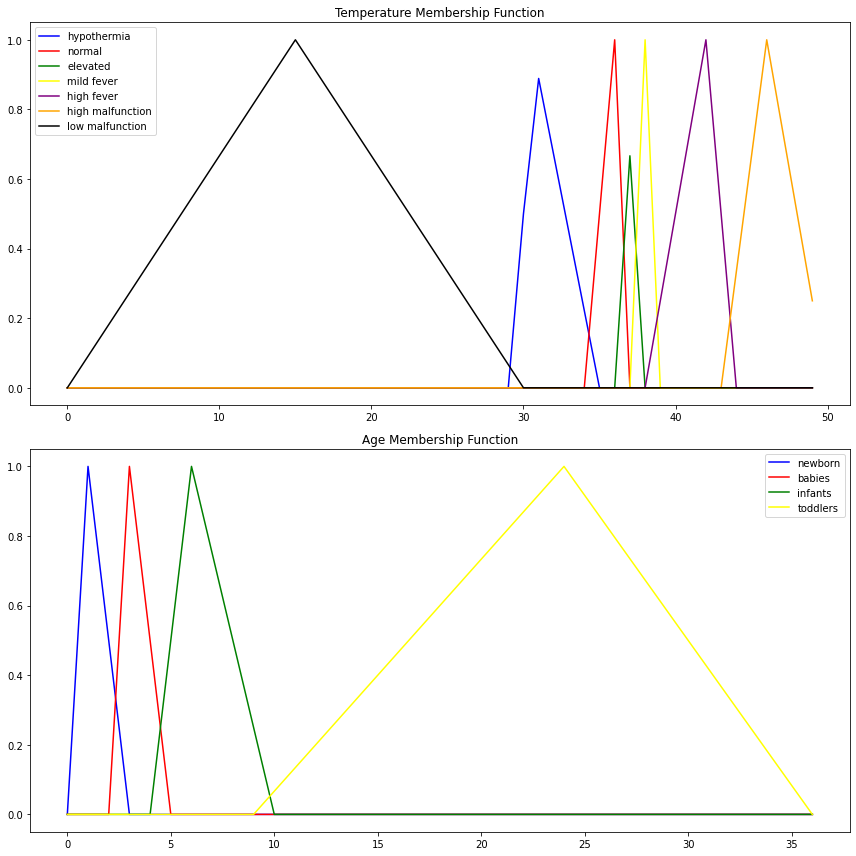

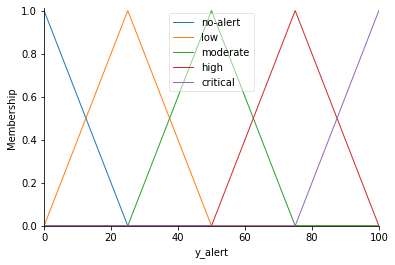

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Generate universe variables
x_age_months =ctrl.Antecedent(np.arange(0, 37, 1),'x_age_months')
x_temperature = ctrl.Antecedent(np.arange(0,50,1),'x_temperature')
y_alert = ctrl.Consequent(np.arange(0, 101, 1), 'y_alert')
alertLevels=["no-alert","low","moderate","high","critical"]



# Generate fuzzy membership functions
x_age_months['newborn'] = fuzz.trimf(x_age_months.universe, [0, 1, 3])
x_age_months['babies'] = fuzz.trimf(x_age_months.universe, [2, 3, 5])
x_age_months['infants'] = fuzz.trimf(x_age_months.universe, [4, 6, 10])
x_age_months['toddlers'] = fuzz.trimf(x_age_months.universe, [9,24,36])

# Generate fuzzy membership functions
x_temperature["hypothermia"] = fuzz.trimf(x_temperature.universe, [29.5, 32.5, 35])
x_temperature["normal"] = fuzz.trimf(x_temperature.universe, [34, 36, 37])
x_temperature["elevated"] = fuzz.trimf(x_temperature.universe, [36, 37.5, 38])
x_temperature["mildFever"] = fuzz.trimf(x_temperature.universe, [37, 38, 39])
x_temperature["highFever"] = fuzz.trimf(x_temperature.universe, [38, 42, 44])
x_temperature["highMalfunction"] = fuzz.trimf(x_temperature.universe, [43, 46, 50])
x_temperature["lowMalfunction"] = fuzz.trimf(x_temperature.universe, [0, 15, 30])


print(type(x_age_months.input))

#generate fuzzy membership function
alertLevel = y_alert.automf(names=alertLevels)


# # Visualize these universes and membership functions
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(12, 12))

ax0.plot(x_temperature.universe, fuzz.trimf(x_temperature.universe, [29.5, 30.5, 35]), 'b', linewidth=1.5,label="hypothermia")
ax0.plot(x_temperature.universe, fuzz.trimf(x_temperature.universe, [34, 36, 37]), 'r', linewidth=1.5,label="normal")
ax0.plot(x_temperature.universe, fuzz.trimf(x_temperature.universe, [36, 37.5, 38]), 'g', linewidth=1.5,label="elevated")
ax0.plot(x_temperature.universe, fuzz.trimf(x_temperature.universe, [37, 38, 39]), 'yellow', linewidth=1.5,label="mild fever")
ax0.plot(x_temperature.universe, fuzz.trimf(x_temperature.universe, [38, 42, 44]), 'purple', linewidth=1.5,label="high fever")
ax0.plot(x_temperature.universe, fuzz.trimf(x_temperature.universe, [43, 46, 50]), 'orange', linewidth=1.5,label="high malfunction")
ax0.plot(x_temperature.universe, fuzz.trimf(x_temperature.universe, [0,15,30]), 'black', linewidth=1.5,label="low malfunction")
ax0.set_title('Temperature Membership Function')
ax0.legend()


ax1.plot(x_age_months.universe, fuzz.trimf(x_age_months.universe, [0, 1, 3]), 'b', linewidth=1.5,label="newborn")
ax1.plot(x_age_months.universe, fuzz.trimf(x_age_months.universe, [2, 3, 5]), 'r', linewidth=1.5,label="babies")
ax1.plot(x_age_months.universe, fuzz.trimf(x_age_months.universe, [4, 6, 10]), 'g', linewidth=1.5,label="infants")
ax1.plot(x_age_months.universe, fuzz.trimf(x_age_months.universe, [9,24,36]), 'yellow', linewidth=1.5,label="toddlers")

ax1.set_title('Age Membership Function')
ax1.legend()

plt.tight_layout()


y_alert.view()

### Step 2: Define the rules
Translate the desired behaviour given above, to rules for alert levels. Start by only defining those which are given. More may be needed, after inspecting the output (Step 4).

In [2]:

rule0 = ctrl.Rule(antecedent=((x_temperature['highMalfunction'] | x_temperature['lowMalfunction'])),consequent=y_alert["moderate"])
rule1 = ctrl.Rule(antecedent=((x_age_months['newborn'] & x_temperature['elevated'])),consequent=y_alert["moderate"])
rule2 = ctrl.Rule(antecedent=((x_age_months['newborn'] & x_temperature['mildFever'])),consequent=y_alert["high"])
rule3 = ctrl.Rule(antecedent=((x_age_months['newborn'] & x_temperature['highFever'])),consequent=y_alert["critical"])
rule4 = ctrl.Rule(antecedent=((x_age_months['babies'] & x_temperature['mildFever'])),consequent=y_alert["low"])
rule5 = ctrl.Rule(antecedent=((x_age_months['babies'] & x_temperature['highFever'])),consequent=y_alert["moderate"])
rule6 = ctrl.Rule(antecedent=((x_age_months['toddlers'] & (x_temperature['highFever'] |x_temperature['mildFever'] ))),consequent=y_alert["low"])
rule7 = ctrl.Rule(antecedent=((~(x_age_months['newborn']) & x_temperature["hypothermia"])),consequent=y_alert["high"])
rule8 = ctrl.Rule(antecedent=((x_age_months['newborn'] & x_temperature["hypothermia"] )),consequent=y_alert["critical"])
rule9 = ctrl.Rule(antecedent=((x_age_months['newborn'] & x_temperature['normal'])),consequent=y_alert["no-alert"])

rule11 = ctrl.Rule(antecedent=((x_age_months['infants'] & x_temperature['mildFever'])),consequent=y_alert["low"])
rule12 = ctrl.Rule(antecedent=((x_age_months['infants'] & x_temperature['highFever'])),consequent=y_alert["moderate"])
rule13 = ctrl.Rule(antecedent=(((x_age_months['infants'] | x_age_months['babies'] | x_age_months['toddlers']) & (x_temperature['elevated']|x_temperature["normal"] ))),consequent=y_alert["no-alert"])


#malfunctioning remaining 
print(rule1)
print(rule2)
print(rule3)
print(rule4)
print(rule5)
print(rule6)
print(rule7)
print(rule8)
print(rule9)
print(rule0)
print(rule11)
print(rule12)
print(rule13)

# rules added after step 4





IF x_age_months[newborn] AND x_temperature[elevated] THEN y_alert[moderate]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF x_age_months[newborn] AND x_temperature[mildFever] THEN y_alert[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF x_age_months[newborn] AND x_temperature[highFever] THEN y_alert[critical]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF x_age_months[babies] AND x_temperature[mildFever] THEN y_alert[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF x_age_months[babies] AND x_temperature[highFever] THEN y_alert[moderate]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF x_age_months[toddlers] AND (x_temperature[highFever] OR x_temperature[mildFever]) THEN y_alert[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF (NOT-x_age_months[newborn]) AND x_temperature[hypothermia] THEN y_alert[high]
	AND aggregation function : fmin
	OR aggregatio

### Step 3: Load and test the system
Make a control system by loading the rules. Now verify the output for particular inputs using the control system simulation. Output the alert level, and visualize the alert membership. __Tip:__ use the functions ctrl.ControlSystemSimulation and alert.view(). 


9.72222222222222


C:\Users\tripa\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


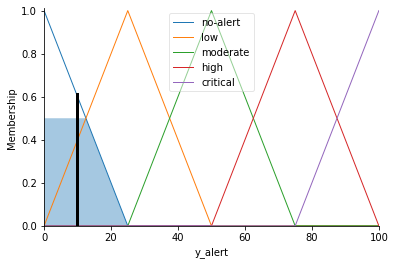

In [3]:
monitor_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule0,rule11,rule12,rule13])
monitoring = ctrl.ControlSystemSimulation(monitor_ctrl)

monitoring.input["x_age_months"] = 8
monitoring.input["x_temperature"] = 35

monitoring.compute()

print(monitoring.output["y_alert"])
y_alert.view(sim=monitoring)

### Step 4: Test the system

Make plots of the evolution of the alerts, for the following cases

    * For an age of 1 month, the alert level as a function of the temperature [28, 50] with increments of 0.5.
    * For an age of 8 months, the alert level as a function of the temperature [28, 50] with increments of 0.5.
    * For a temperature of 38.5 degrees Celcius, the alert level as a function of the age [1,36] with increments of 1.
    * For a temperature of 40 degrees Celcius, the alert level as a function of the age [1,36] with increments of 1.
    
Add rules for cases not currently covered (and which may give errors due to sparsity in the inference engine).


        

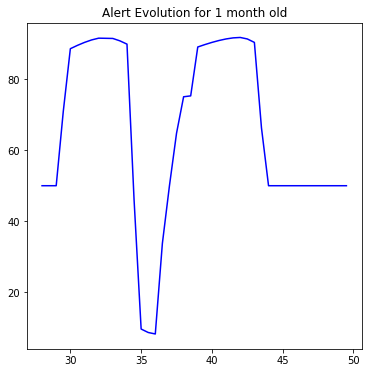

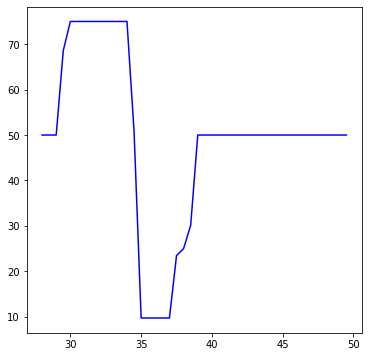

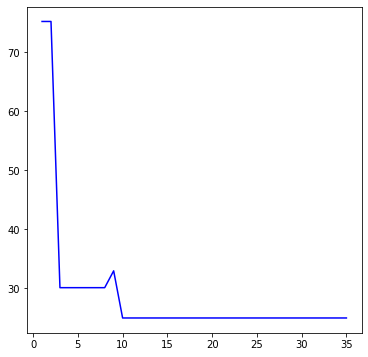

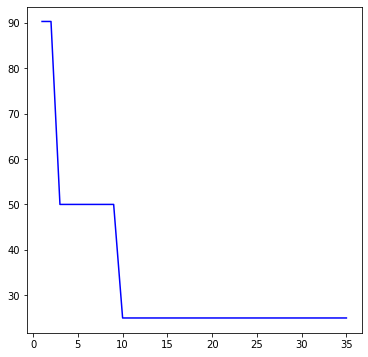

In [4]:
monitoring.input["x_age_months"]=1
x_temperature = np.arange(28,50,0.5)
y_output_alert_1_month=[]
for i in x_temperature:
    monitoring.input["x_temperature"] = i
    monitoring.compute()
    y_output_alert_1_month.append(monitoring.output["y_alert"])

monitoring.input["x_age_months"]=8
y_output_alert_8_month=[]
for i in x_temperature:
    monitoring.input["x_temperature"] = i
    monitoring.compute()
    y_output_alert_8_month.append(monitoring.output["y_alert"])


fig, (ax2) = plt.subplots(nrows=1, figsize=(6, 6))
ax2.plot(x_temperature,y_output_alert_1_month, 'b', linewidth=1.5)
ax2.set_title('Alert Evolution for 1 month old')

fig, (ax3) = plt.subplots(nrows=1, figsize=(6, 6))
ax3.plot(x_temperature,y_output_alert_8_month,'b', linewidth=1.5)
ax3.set_title("Alert Evolution for 8 months old")

monitoring.input["x_temperature"] = 38.5
y_output_alert_38_temperature = []
x_age = np.arange(1,36,1)
for i in x_age:
    monitoring.input["x_age_months"] = i
    monitoring.compute()
    y_output_alert_38_temperature.append(monitoring.output["y_alert"])

fig, (ax4) = plt.subplots(nrows=1, figsize=(6, 6))
ax4.plot(x_age,y_output_alert_38_temperature,'b', linewidth=1.5)
ax4.set_title("Alert Evoltuion for all ages for 38.5 degree Celsius")


monitoring.input["x_temperature"] = 40
y_output_alert_40_temperature = []
for i in x_age:
    monitoring.input["x_age_months"] = i
    monitoring.compute()
    y_output_alert_40_temperature.append(monitoring.output["y_alert"])

fig, (ax5) = plt.subplots(nrows=1, figsize=(6, 6))
ax5.plot(x_age,y_output_alert_40_temperature,'b', linewidth=1.5)
ax5.set_title("Alert Evoltuion for all ages for 40 degree Celsius")




### Step 5:  Visualize the output and tune the system

Make a 3D surface plot (function ***plot_surface()***) with the output of the alert system for ages [1,36] and temperatures [28, 46]. Tune the system such that the alert level is always within the no-alert range for temperatures in the range [36.5, 37.5]. You can adjust the system by modifying the membership functions, changing the rules or inference system; till you obtain the desired behaviour. Modifications towards Step 1 are allowed here.

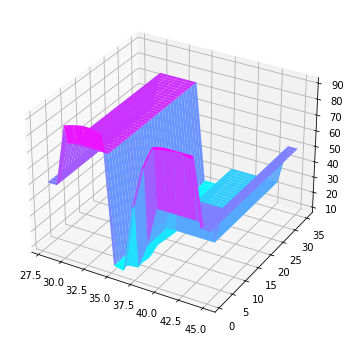

In [5]:
from mpl_toolkits import mplot3d 
temperatures_range = np.arange(28, 46, 1)
age_range = np.arange(1, 36, 1)

temperature, age = np.meshgrid(temperatures_range, age_range)



def calc_alert(temp,age):
    monitoring.input["x_age_months"] = age
    monitoring.input["x_temperature"] = temp
    monitoring.compute()    
    return np.array(monitoring.output["y_alert"])


alert = calc_alert(temperature, age)


fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection ='3d') 

my_cmap = plt.get_cmap('cool') 

surf = ax.plot_surface(temperature, age, alert, cmap = my_cmap, edgecolor ='none') 

## Part 2: A Bayesian belief network for lung cancer
In this exercise we will translate clinical knowledge into a bayesian belief network (the percentages given below are fictive). The goal is to compute the probabilities of presence of cancer, given certain information about the patient. Additionally, we wish to determine the impact on diagnostic tests, when prior information about the patient is given. 

The changes for lung cancer for someone living a healthy life in a healthy surrounding are slim (3%). They are mainly influenced by smoking (7%), being exposed to pollution (6%), or both (9%). Patients over 50 (about 30% of the population) have the biggest chance of being exposed to pollution (60%), which is significantly more than patients with ages below 50 (10%). Patients over 50 are also more likely to smoke. In fact, one in four males over 50 still smokes, while only 13% of females over 50 smokes. With respect to the population with ages below 50 the difference is remarkable: 20% and 7% for males and females, respectively.  

Two tests are primarily done to determine lung cancer: an X-ray scan of the chest, and a Serum Calcium test. Lung cancer has about 85% chance of getting detected using an X-ray. In rare cases (5%), X-ray leads to a positive reading for cases where there is no tumour present. This can be verified using CT imaging. The serum calcium test is cheap, but not very reliable for lung cancer: only 70% sensitivity and a false positive result in about 35% of the negative cases.


### Step 1: Design the probalistic graphical model 
Use the package graphviz to draw the bayesian belief network and visualize the network. For now, focuss on dependencies between the different criteria by establishing edges between the different nodes. You should end up with a graph of seven nodes. 


In [1]:
from graphviz import Digraph as dia

graph = dia(comment='Chances for lung cancer')
graph.node('L', 'Lung cancer')
graph.node('G', 'Gender')
graph.node('A', 'Age')
graph.node('S', 'Smoking')
graph.node('P', 'Pollution')
graph.node('X', 'X-Ray')
graph.node('C', 'Serum Calcium')

graph.edges(['AS', 'GS', 'AP', 'SL', 'PL', 'LX','LC'])
graph.render(directory='doctest-output', view=True)

'doctest-output\\Digraph.gv.pdf'

### Step 2: Build the probabilistic graphical model
Now use the package pgmpy to build the computational probabilistic graphical model, named cancer_model, by specifying the edges. You can verify the model you defined using the cancer_model.edges() and cancer_model.nodes() commands.

In [17]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import DBNInference

edges = [
    ('Age','Smoking'),
    ('Gender','Smoking'),
    ('Age','Pollution'),
    ('Smoking','Lung cancer'),
    ('Pollution','Lung cancer'),
    ('Lung cancer','X-Ray'),
    ('Lung cancer','Serum Calcium')
]
# model = DynamicBayesianNetwork([('A', 'S'), ('G', 'S'), ('A', 'P'), ('S', 'L'), ('P', 'L'), ('L', 'X'), ('L', 'C')])
model = BayesianNetwork(edges)

In [18]:
print("Edges: " + str(model.edges()))

Edges: [('Age', 'Smoking'), ('Age', 'Pollution'), ('Smoking', 'Lung cancer'), ('Gender', 'Smoking'), ('Pollution', 'Lung cancer'), ('Lung cancer', 'X-Ray'), ('Lung cancer', 'Serum Calcium')]


In [19]:
print("Nodes: " + str(model.nodes()))

Nodes: ['Age', 'Smoking', 'Gender', 'Pollution', 'Lung cancer', 'X-Ray', 'Serum Calcium']


### Step 3: Define the conditional probability distributions (CPDs)
Using the knowledge given above, fill in the conditional probabilities for each node using the TabularCPD command. Finding out the order of the probabilities can be a bit tricky. Have a look at http://pgmpy.org/factors.html for an example. The probability of male vs female is 50%.

In [20]:
cpd_age = TabularCPD('Age',2,values=[[0.7],[0.3]])
print("0 - Less than 50 and 1 - More than 50")
print(cpd_age)

cpd_gender = TabularCPD('Gender',2,values=[[0.5],[0.5]])
print("0 - Male and 1 - Female")
print(cpd_gender)

cpd_smoking = TabularCPD(
    variable="Smoking",
    variable_card=2,
    values=[[0.8, 0.93, 0.75, 0.87], [0.2, 0.07, 0.25, 0.13]],
    evidence=["Gender", "Age"],
    evidence_card=[2, 2]
)
print("0 - Non-Smokers and 1 - Smokers")
print(cpd_smoking)

cpd_pollution = TabularCPD(
    variable="Pollution",
    variable_card=2,
    values=[[0.9, 0.4], [0.1, 0.6]],
    evidence=["Age"],
    evidence_card=[2]
)
print("0 - No exposure to pollution and 1 - Exposure to pollution")
print(cpd_pollution)

cpd_lungCancer = TabularCPD(
    variable="Lung cancer",
    variable_card=2,
    values=[[0.97, 0.94, 0.93, 0.91], [0.03, 0.06, 0.07, 0.09]],
    evidence=["Smoking","Pollution"],
    evidence_card=[2,2]
)
print("0 - No Lung cancer and 1 - Lung cancer")
print(cpd_lungCancer)

cpd_XRay = TabularCPD(
    variable="X-Ray",
    variable_card=2,
    values=[[0.95, 0.15], [0.05, 0.85]],
    evidence=["Lung cancer"],
    evidence_card=[2]
)
print("0 - No lung cancer detected and 1 - Lung cancer detected")
print(cpd_XRay)

cpd_serumCalcium = TabularCPD(
    variable="Serum Calcium",
    variable_card=2,
    values=[[0.65, 0.30], [0.35, 0.70]],
    evidence=["Lung cancer"],
    evidence_card=[2]
)
print("0 - No Lung cancer and 1 - Lung cancer")
print(cpd_serumCalcium)

0 - Less than 50 and 1 - More than 50
+--------+-----+
| Age(0) | 0.7 |
+--------+-----+
| Age(1) | 0.3 |
+--------+-----+
0 - Male and 1 - Female
+-----------+-----+
| Gender(0) | 0.5 |
+-----------+-----+
| Gender(1) | 0.5 |
+-----------+-----+
0 - Non-Smokers and 1 - Smokers
+------------+-----------+-----------+-----------+-----------+
| Gender     | Gender(0) | Gender(0) | Gender(1) | Gender(1) |
+------------+-----------+-----------+-----------+-----------+
| Age        | Age(0)    | Age(1)    | Age(0)    | Age(1)    |
+------------+-----------+-----------+-----------+-----------+
| Smoking(0) | 0.8       | 0.93      | 0.75      | 0.87      |
+------------+-----------+-----------+-----------+-----------+
| Smoking(1) | 0.2       | 0.07      | 0.25      | 0.13      |
+------------+-----------+-----------+-----------+-----------+
0 - No exposure to pollution and 1 - Exposure to pollution
+--------------+--------+--------+
| Age          | Age(0) | Age(1) |
+--------------+--------+

### Step 4: Associate the CPDs to the model structure, and test the model
Next, associate the CPDs to the model structure and check for consistency.

Perform inference on you model using VariableElimination and verify the outcome is intuitively correct for all nodes (e.g. chance of cancer should increase given evidence of smoking, etc.). Adjust the definition of the CPDs if needed. 

In [21]:
from pgmpy.inference import VariableElimination

model.add_cpds(cpd_age, cpd_gender, cpd_smoking, cpd_pollution, cpd_lungCancer, cpd_XRay, cpd_serumCalcium)
model.check_model()

True

In [23]:
infer = VariableElimination(model)

age_less50 = infer.query(variables=['Lung cancer'], evidence={'Age':0},show_progress=False)
print("Probability of Lung Cancer given Age<50")
print(age_less50)

age_more50 = infer.query(variables=['Lung cancer'], evidence={'Age':1},show_progress=False)
print("Probability of Lung Cancer given Age>50")
print(age_more50)

male = infer.query(variables=['Lung cancer'], evidence={'Gender':0},show_progress=False)
print("Probability of Lung Cancer given Gender is Male")
print(male)

female = infer.query(variables=['Lung cancer'], evidence={'Gender':1},show_progress=False)
print("Probability of Lung Cancer given Gender is Female")
print(female)

nonsmoker = infer.query(variables=['Lung cancer'], evidence={'Smoking':0},show_progress=False)
print("Probability of Lung Cancer given Non Smoker")
print(nonsmoker)

smoker = infer.query(variables=['Lung cancer'], evidence={'Smoking':1},show_progress=False)
print("Probability of Lung Cancer given Smoker")
print(smoker)

nonpollution = infer.query(variables=['Lung cancer'], evidence={'Pollution':0},show_progress=False)
print("Probability of Lung Cancer given there is no pollution")
print(nonpollution)

pollution = infer.query(variables=['Lung cancer'], evidence={'Pollution':1},show_progress=False)
print("Probability of Lung Cancer given there is pollution")
print(pollution)

xray_pos = infer.query(variables=['Lung cancer'], evidence={'X-Ray':1},show_progress=False)
print("Probability of Lung Cancer given a positive X-Ray")
print(xray_pos)

xray_neg = infer.query(variables=['Lung cancer'], evidence={'X-Ray':0},show_progress=False)
print("Probability of Lung Cancer given a negative X-Ray")
print(xray_neg)

serum_pos = infer.query(variables=['Lung cancer'], evidence={'Serum Calcium':1},show_progress=False)
print("Probability of Lung Cancer given a positive Serum Calcium Test")
print(serum_pos)

serum_neg = infer.query(variables=['Lung cancer'], evidence={'Serum Calcium':0},show_progress=False)
print("Probability of Lung Cancer given a negative Serum Calcium Test")
print(serum_neg)

Probability of Lung Cancer given Age<50
+----------------+--------------------+
| Lung cancer    |   phi(Lung cancer) |
+================+====================+
| Lung cancer(0) |             0.9582 |
+----------------+--------------------+
| Lung cancer(1) |             0.0418 |
+----------------+--------------------+
Probability of Lung Cancer given Age>50
+----------------+--------------------+
| Lung cancer    |   phi(Lung cancer) |
+================+====================+
| Lung cancer(0) |             0.9486 |
+----------------+--------------------+
| Lung cancer(1) |             0.0514 |
+----------------+--------------------+
Probability of Lung Cancer given Gender is Male
+----------------+--------------------+
| Lung cancer    |   phi(Lung cancer) |
+================+====================+
| Lung cancer(0) |             0.9563 |
+----------------+--------------------+
| Lung cancer(1) |             0.0437 |
+----------------+--------------------+
Probability of Lung Cancer given

### Step 5: Use your model to compute probabilities and answer questions

    * Whithout any information about the patient, what are the chances of having lung cancer, a positive X-ray and a positive serum Calcium test. Explain the discrepancy.  

In [24]:
infer = VariableElimination(model)

In [32]:
lungCancer_noinfo = infer.query(variables = ['Lung cancer'],show_progress=False)
print("Probability that a person has lung cancer given no information about the patient ",lungCancer_noinfo.values[1])

serumCal_noinfo = infer.query(variables = ['Serum Calcium'],show_progress=False)
print("Probability that a person has positive serum calcium test given no information about the patient ",serumCal_noinfo.values[1])


Xray_noinfo = infer.query(variables = ['X-Ray'],show_progress=False)
print("Probability that a person has positive x-ray given no information about the patient ",serumCal_noinfo.values[1])


Probability that a person has lung cancer given no information about the patient  0.0446625
Probability that a person has positive serum calcium test given no information about the patient  0.36563187499999994
Probability that a person has positive x-ray given no information about the patient  0.36563187499999994


    * What are the probabilities in case we have evidence about the age (>50) and smoking behaviour (smoker) of the patient? Explain the difference with the first case.  

In [35]:
lungCancer_evi = infer.query(variables = ['Lung cancer'],evidence={'Age':1,'Smoking':1},show_progress=False)
print("Probability that a person has lung cancer given that the patient is more than 50 years old and smokes ",lungCancer_evi.values[1])

xray_evi = infer.query(variables = ['X-Ray'],evidence={'Age':1,'Smoking':1},show_progress=False)
print("Probability that a person has positive xray given that the patient is more than 50 years old and smokes ",xray_evi.values[1])

serum_evi = infer.query(variables = ['Serum Calcium'],evidence={'Age':1,'Smoking':1},show_progress=False)
print("Probability that a person has positive serum calcium test given that the patient is more than 50 years old and smokes ",serum_evi.values[1])

Probability that a person has lung cancer given that the patient is more than 50 years old and smokes  0.08199999999999999
Probability that a person has positive xray given that the patient is more than 50 years old and smokes  0.11560000000000002
Probability that a person has positive serum calcium test given that the patient is more than 50 years old and smokes  0.37870000000000004


The probability values have increased for lung cancer, xray and positive serum calcium test because all three are dependent on the age and smoking behaviour of a person. Because now we have more information and the information points to higher chances of having cancer there is an increase in all values.

    * What are the probabilities in case we have evidence of cancer (but not about the about the age and smoking behaviour of the patient)? Explain the difference with the previous cases.  

In [37]:
xray_evid = infer.query(variables=['X-Ray'], evidence={'Lung cancer': 1}, show_progress=False)
print("Probability that a person has positive xray given that the patient has cancer ",xray_evid.values[1])

serum_evid = infer.query(variables=['Serum Calcium'], evidence={'Lung cancer': 1}, show_progress=False)
print("Probability that a person has positive serum calcium test given that the patient has cancer ",serum_evid.values[1])

Probability that a person has positive xray given that the patient has cancer  0.85
Probability that a person has positive serum calcium test given that the patient has cancer  0.7


Now the probability values have increased further because we already know that the patient has lung cancer. This leads to infering that there is a higher chance that the xray scan and serum calcium tests will turn out positive

    * What are the probabilities in case we have evidence of cancer, and about the age (>50) and smoking behaviour (smoker) of the patient? Explain the difference with the previous cases.  

In [38]:
x_evide = infer.query(variables=['X-Ray'], evidence={'Age': 1, 'Smoking': 1, 'Lung cancer':1}, show_progress=False)
print("Probability that a person has positive xray given that the patient has cancer and is more than 50 years old and smokes ",x_evide.values[1])

serum_evide = infer.query(variables=['Serum Calcium'], evidence={'Age': 1, 'Smoking': 1, 'Lung cancer':1}, show_progress=False)
print("Probability that a person has positive serum calcium test given that the patient has cancer and is more than 50 years old and smokes  ",serum_evide.values[1])

Probability that a person has positive xray given that the patient has cancer and is more than 50 years old and smokes  0.85
Probability that a person has positive serum calcium test given that the patient has cancer and is more than 50 years old and smokes   0.7


We do not see a change in probabilities because there is no direct depeendence of age and smoking behavior on x ray and serum calcium tests. The x ray and serum tests are only independent on a person having having cancer.
